In [1]:
import sys
sys.modules[__name__].__dict__.clear()

1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

2. Importing Data 

In [3]:
adata = sc.read_10x_mtx(
    'c:/Users/brand/OneDrive/Desktop/Files/SeuratvsScanpy/data/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

3. Filtering Data based on criteria

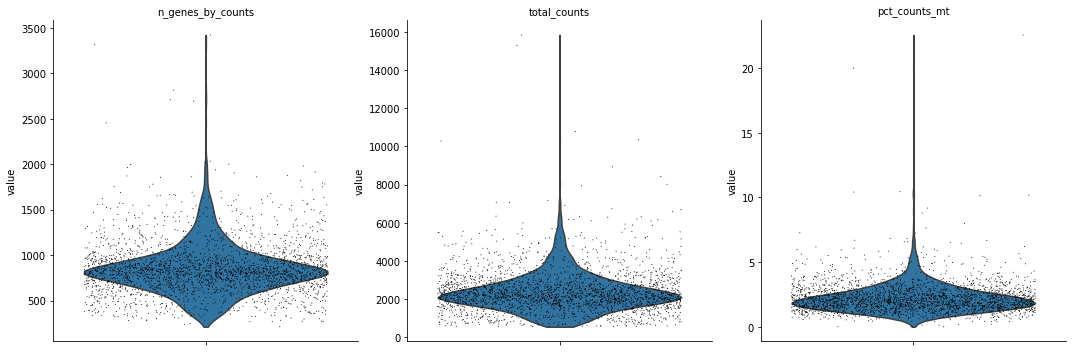

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

4. Normalise, log10, and scale

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

5. PCA and UMAP

c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


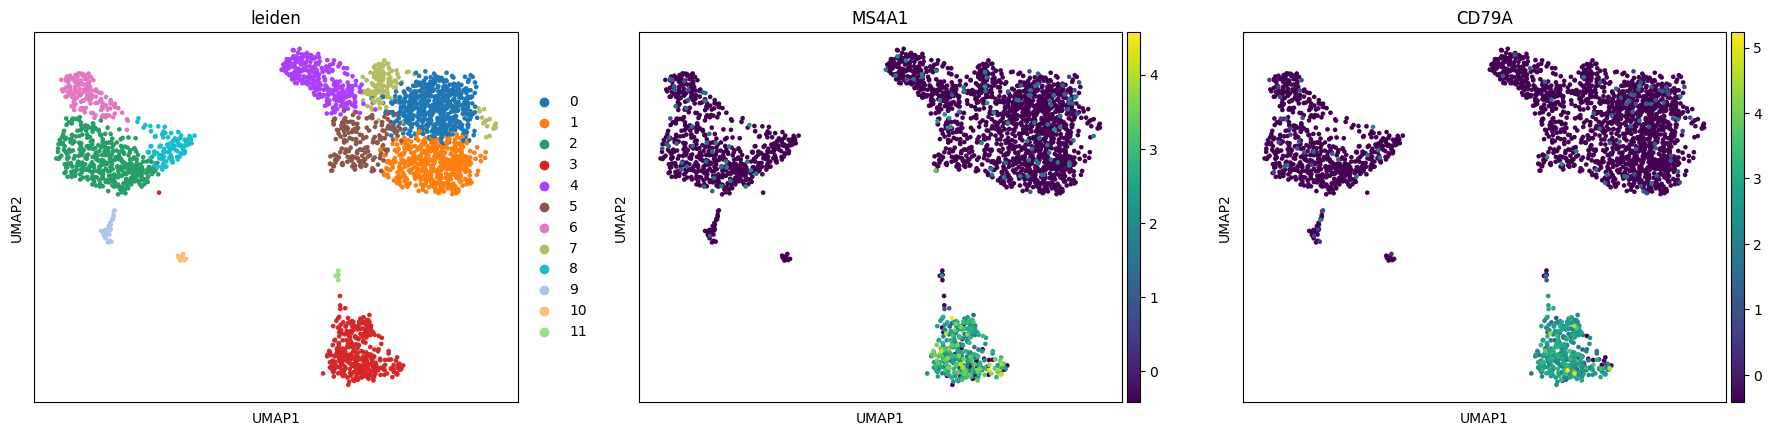

In [6]:
sc.tl.pca(adata, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.umap(adata)
sc.tl.leiden(adata)

sc.pl.umap(adata, color=['leiden', "MS4A1", "CD79A"])

6. Find Markers 

c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\brand\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid 

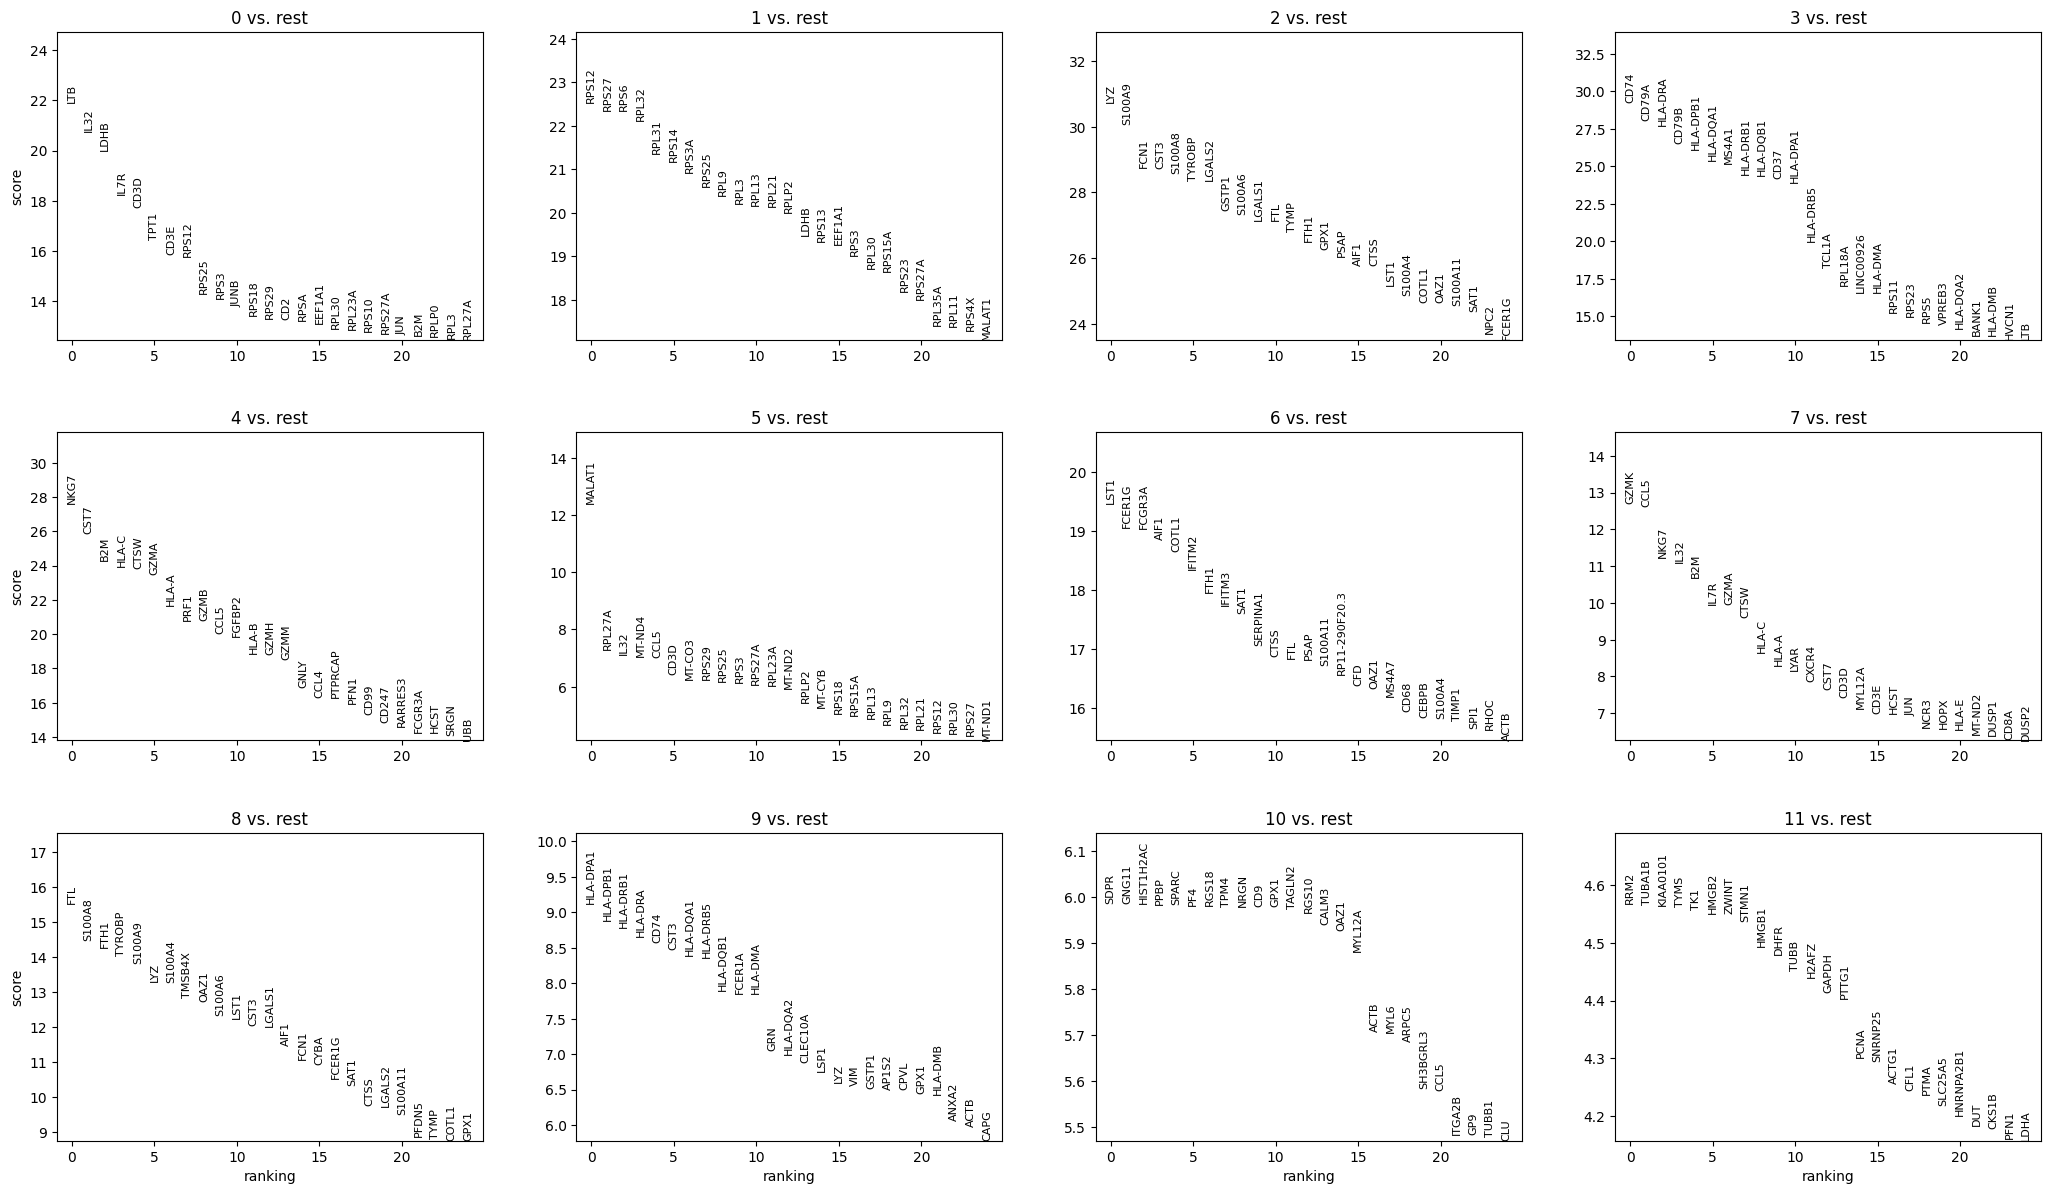

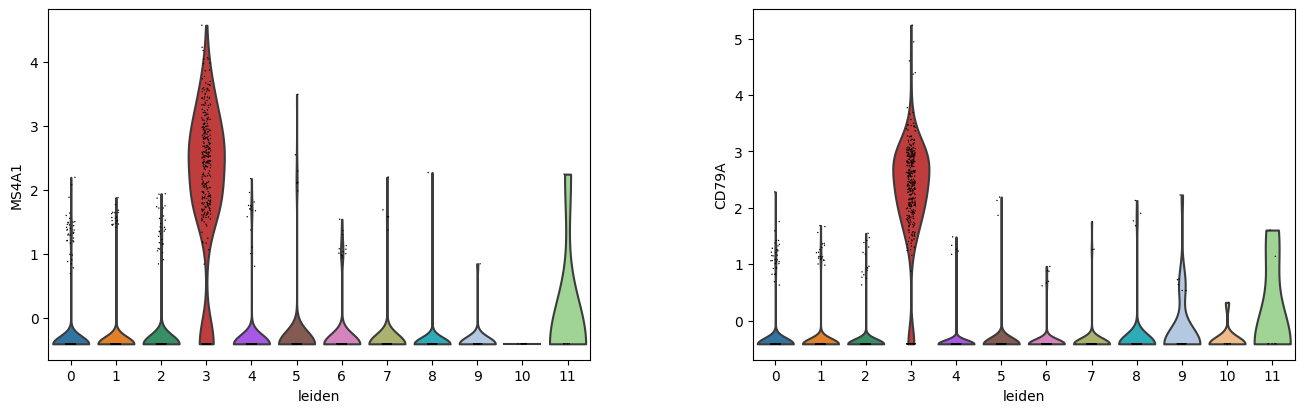

In [7]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

sc.pl.violin(adata, ["MS4A1", "CD79A"], groupby='leiden')